<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/ANN_Image_Processig/Recycle_004_Image_Processing_some_concepts_before_first_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
import random
from google.colab import files

In [2]:
!git clone https://github.com/ucfilho/ANN_2021_01/
%cd ANN_2021_01

fatal: destination path 'ANN_2021_01' already exists and is not an empty directory.
/content/ANN_2021_01


In [3]:
import zipfile
file_name = zipfile.ZipFile('trash.zip', 'r')
file_name.extractall()

In [4]:
# all images are load in variable x...
FILE='trash.zip'
img_name=[]
x_gray=[]
x_original = []
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        #x_gray.append(cv2.imread(name, 0))
        x_gray.append(cv2.resize(cv2.imread(name, 0),(80,60)))

In [5]:
y_names = []
for yy in img_name:
  name = yy[0]+yy[1]+yy[2]
  y_names.append(name)

In [6]:
unique_list = []    
for yy in y_names:
  if yy not in unique_list:
    unique_list.append(yy)

In [7]:
n = len(unique_list)
y = []
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

In [8]:
unique_list

['car', 'gla', 'met', 'pap', 'pla', 'tra']

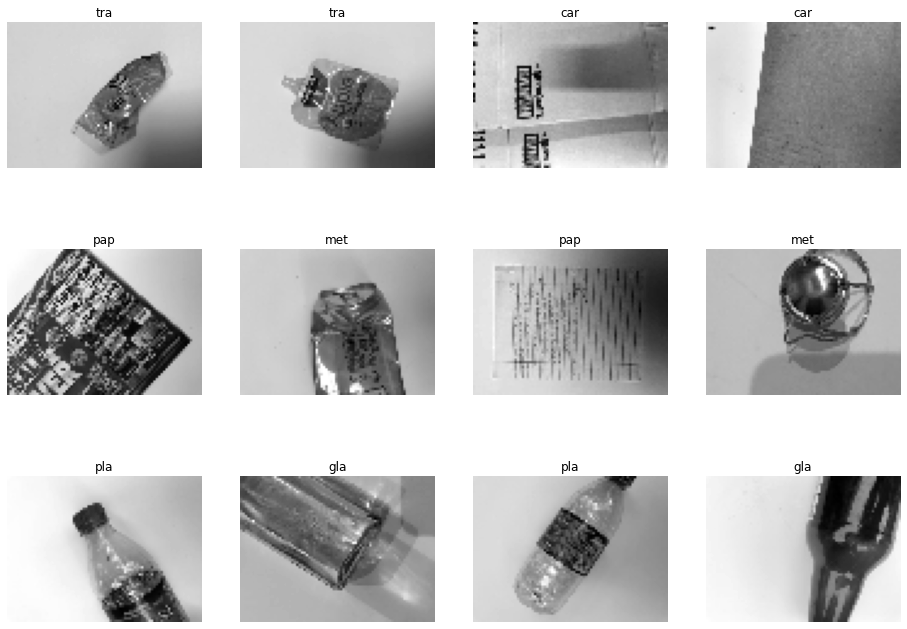

In [9]:
# view some images from the train_ds
num = len(y_names)
plt.figure(figsize=(16, 16))
for i in range(12):
  ax = plt.subplot(4, 4, i + 1)
  kk = random.randrange(num) 
  plt.imshow(x_gray[kk], cmap='gray')
  plt.title(y_names[kk])
  plt.axis("off")

In [10]:
x_data = []
for xx in x_gray:
  x_data.append(xx.ravel())

df = pd.DataFrame(x_data)
print(df)

     0     1     2     3     4     5     ...  4794  4795  4796  4797  4798  4799
0     214   211   210   212   209   201  ...    94    93    95    94    93    94
1     220   220   219   213   215   211  ...    81    80    78    74    73    73
2     209   207   208   207   211   208  ...    62    61    76    43    57    76
3     194   194   190   190   190   188  ...   211   211   212   212   215   214
4     120   119   119   110    99   129  ...   125   132   130   132   133   133
..    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
602   159   158   157   154   152   150  ...   192   193   193   193   193   193
603   255   255   255   255   255   255  ...   152   196   218   220   221   222
604   214   214   212   210   214   215  ...    88    86    84    82    79    78
605   220   219   219   219   220   219  ...    97    97    95    93    93    91
606   222   222   222   222   222   222  ...    57    65    67    62    48    50

[607 rows x 4800 columns]


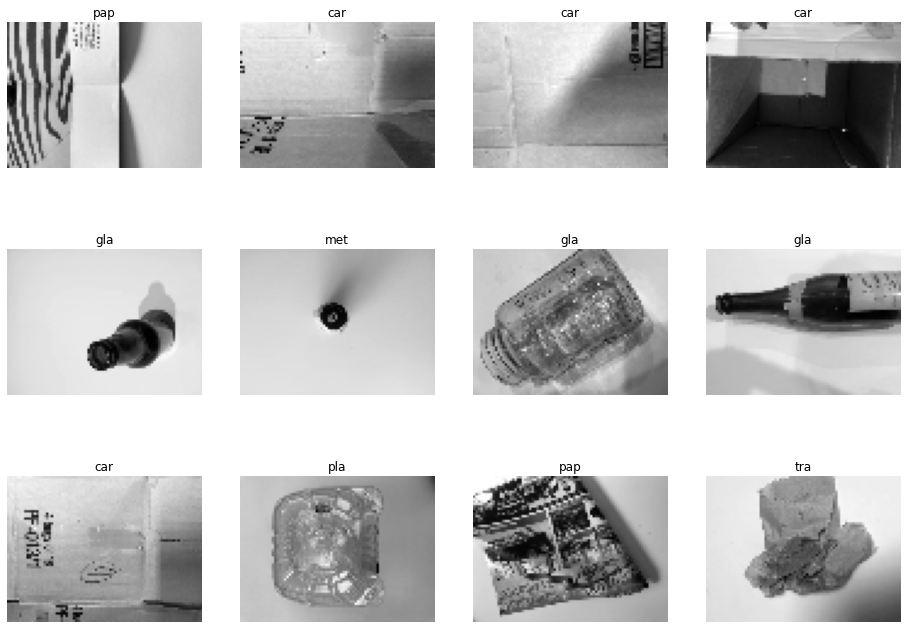

In [11]:
nrows, ncols = df.shape
# view some images from the train_ds
num = nrows
plt.figure(figsize=(16, 16))
for i in range(12):
  ax = plt.subplot(4, 4, i + 1)
  kk = random.randrange(num)
  img_gray = np.array(df.iloc[kk,:]).reshape(60,80)
  plt.imshow(img_gray, cmap='gray')
  plt.title(y_names[kk])
  plt.axis("off")

In [12]:
for kk, yy in enumerate(y_names):
  if(yy == 'car'):
    y_names[kk]='cardboard'
  elif(yy == 'met'):
    y_names[kk]='metal'
  elif(yy == 'pap'):
    y_names[kk]='paper'
  elif(yy == 'pla'):
    y_names[kk]='plastic'
  else:
    y_names[kk]= 'trash'

In [13]:
df['type'] = y_names
df['class'] = y

In [14]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4762,4763,4764,4765,4766,4767,4768,4769,4770,4771,4772,4773,4774,4775,4776,4777,4778,4779,4780,4781,4782,4783,4784,4785,4786,4787,4788,4789,4790,4791,4792,4793,4794,4795,4796,4797,4798,4799,type,class
0,214,211,210,212,209,201,189,196,200,204,202,204,199,201,202,200,202,200,206,203,204,205,201,199,202,201,201,203,205,200,202,198,199,199,199,199,203,200,198,203,...,130,130,127,132,131,130,126,126,126,127,128,122,124,125,127,122,124,120,122,119,124,126,121,116,122,119,114,109,100,96,96,94,94,93,95,94,93,94,cardboard,0
1,220,220,219,213,215,211,210,209,214,214,208,205,205,208,214,213,198,205,210,213,203,206,202,194,194,195,202,199,200,198,204,194,190,190,196,191,196,194,189,193,...,151,155,149,154,149,144,139,135,128,167,158,152,138,124,108,99,95,96,92,94,92,93,92,91,91,90,85,85,84,83,80,80,81,80,78,74,73,73,cardboard,0
2,209,207,208,207,211,208,205,207,205,198,211,200,211,212,213,213,169,206,225,62,58,61,203,204,156,56,119,201,199,203,203,200,200,201,200,201,199,198,198,193,...,111,111,109,109,107,107,106,101,96,96,96,92,90,87,83,84,82,84,81,75,62,84,67,41,54,58,63,58,56,60,48,40,62,61,76,43,57,76,cardboard,0
3,194,194,190,190,190,188,186,170,115,114,116,114,113,114,112,116,55,36,40,41,43,44,50,51,49,56,55,62,52,57,56,57,68,78,74,68,56,76,93,87,...,192,191,184,186,193,190,192,193,189,201,203,204,228,182,161,81,94,63,51,39,169,170,171,185,204,206,206,207,209,210,210,210,211,211,212,212,215,214,cardboard,0
4,120,119,119,110,99,129,155,174,169,180,177,186,189,197,197,196,201,200,204,203,196,206,205,200,204,205,203,205,207,207,197,199,208,200,193,200,196,192,192,185,...,82,82,83,90,93,91,95,99,108,104,107,109,107,113,113,114,118,125,123,123,131,125,135,138,134,129,135,127,127,123,132,130,125,132,130,132,133,133,cardboard,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,159,158,157,154,152,150,148,145,144,141,139,137,136,134,132,130,129,128,127,127,125,125,124,124,121,120,120,120,118,115,115,115,114,114,113,112,111,110,109,109,...,200,208,212,212,195,213,207,209,203,201,199,214,215,216,206,216,222,217,212,176,188,185,185,188,189,189,189,189,190,190,190,190,192,193,193,193,193,193,trash,5
603,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254,254,255,255,255,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,255,255,255,255,...,59,57,115,65,76,69,67,81,106,120,113,100,96,97,87,71,99,89,205,252,252,250,250,250,249,246,242,231,196,181,216,178,152,196,218,220,221,222,trash,5
604,214,214,212,210,214,215,215,215,215,216,216,216,216,217,216,217,217,217,217,217,217,217,216,215,217,217,217,217,217,217,217,217,217,217,217,217,218,218,218,218,...,159,156,152,148,145,143,141,138,138,137,136,134,133,132,129,129,127,125,124,123,121,118,115,113,110,108,106,102,98,97,93,92,88,86,84,82,79,78,trash,5
605,220,219,219,219,220,219,219,219,219,220,220,220,219,219,220,220,220,220,220,220,220,221,221,219,219,220,219,219,219,219,220,220,220,220,220,220,220,220,221,221,...,159,154,151,147,142,138,134,129,124,122,120,120,118,117,119,116,115,114,116,113,113,111,110,110,108,106,105,103,103,100,100,98,97,97,95,93,93,91,trash,5


In [15]:
Arq = "Recycle_jun_10_2021.xlsx"
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>